In [1]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
from google.colab import drive
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly as py
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pc = pd.read_excel('/content/drive/MyDrive/Practice data/products catalog.xlsx')
pd = pd.read_csv('/content/drive/MyDrive/Practice data/product details.csv')

In [4]:
# merging 2 datasets when column names are different

df = pc.merge(pd, left_on='ID', right_on='ProductID')

In [5]:
# shift column 'ID' to first position

first_column = df.pop('ID')

In [6]:
# insert column using insert(position,column_name,
# first_column) function

df.insert(0, 'ID', first_column)


In [7]:
#checing data head

df.head(1)

,ID,Gender,Price (INR),NumImages,Description,PrimaryColor,ProductID,ProductName,ProductBrand
0,10182131,Women,593,5,"Off-White printed woven A-line top, has a rou...",White,10182131,Bhama Couture Women Off-White Printed Pure Cot...,Bhama Couture


In [8]:
# dropping extra columns that has same information

df.drop(['ProductID'], axis=1, inplace=True)

In [9]:
#renaming column names

df.rename(columns = {'ID':'Product_ID','Price (INR)':'Price','ProductName':'Product_Name','ProductBrand':'Product_Brand','PrimaryColor':'Primary_Color','NumImages':'Num_Images'}, inplace = True)

In [10]:
#Checking for missing values

df.isnull().sum()

Product_ID         0
Gender             0
Price              0
Num_Images         0
Description        0
Primary_Color    894
Product_Name       0
Product_Brand      0
dtype: int64

In [11]:
#Filling null values to 'others'

df["Primary_Color"].fillna("Others", inplace = True)

In [12]:
#Checking null values again

df.isnull().sum()

Product_ID       0
Gender           0
Price            0
Num_Images       0
Description      0
Primary_Color    0
Product_Name     0
Product_Brand    0
dtype: int64

In [13]:
# removing white space of each string in the column

df["Primary_Color"]=[x.strip() for x in df["Primary_Color"]]

In [14]:
# adding lenght of color

df["Primary_Color_len"]= df["Primary_Color"].str.len()

In [15]:
# Removing the column which was added to check lenght of string in primary_color column

df.drop(['Primary_Color_len'], axis=1, inplace=True)

In [16]:
df.describe()

,Product_ID,Price,Num_Images
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [17]:
# rows and columns in the dataset

df.shape

(12491, 8)

In [18]:
df['Gender'].value_counts()

Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: Gender, dtype: int64

Gender column will tell us which gender is given preference when it comes to listing the product. We can see here there is no much difference in men and women. Product listing for men and women are more or less equal.

**We will perform Univariate, Bivariate and Multivariate analysis on our dataset our target column will be price. We will see how price is getting affected due to each variable.**

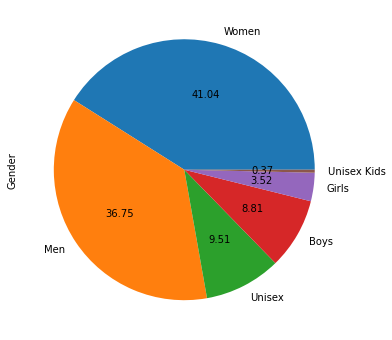

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f',ax=ax)

Seeing this chart we can say that most of the brands have listed less than 100 products only some have more than 100. There are exceptions also like **Indian Terrain** has listed more than 700 products.

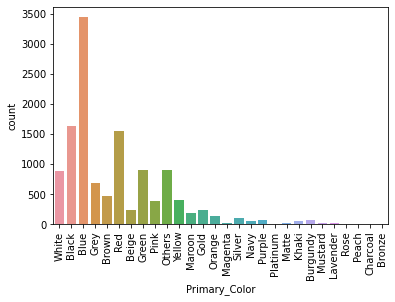

In [23]:
sns.countplot(df['Primary_Color'])
plt.xticks(rotation=90)
plt.show()

We can see Blue is the most preferred color among all

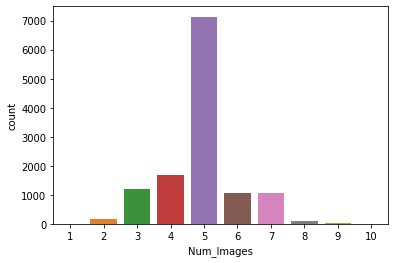

In [24]:
sns.countplot(df['Num_Images'])

Here we see that mostly products has atleast 5 images to attract the customers

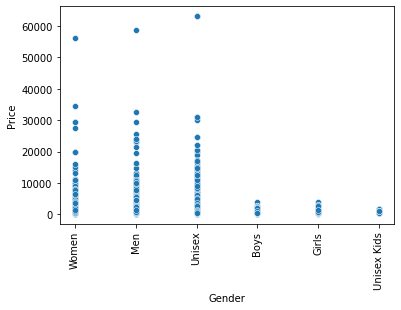

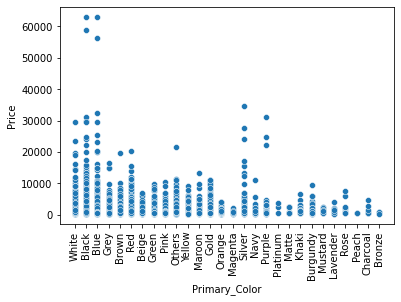

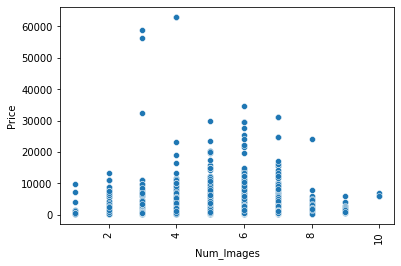

In [43]:
sns.scatterplot(data=df, x='Gender', y='Price')
plt.xticks(rotation=90)
plt.show()
sns.scatterplot(data=df, x='Primary_Color', y='Price')
plt.xticks(rotation=90)
plt.show()
sns.scatterplot(data=df, x='Num_Images', y='Price')
plt.xticks(rotation=90)
plt.show()

In [26]:
#selecting top 20 brands by price

Top_brands = df.sort_values(by=['Price'],ascending=False).head(10)

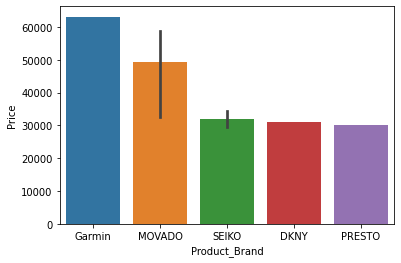

In [27]:
sns.barplot(data=Top_brands, x='Product_Brand', y='Price')

We completed Bivariate analysis
Insights:
1.   First we performed Brand and price analysis we can see that most of the brands products costs less than 7K
2.   Gender is also effecting the price. Women products are costly then men. However there are some outliers otherwise there is no much variation in gender and price
3.   More or less all the variables effecting product price
4.   We identified top brands by price there are 5 brands who are selling products costing more than 30K

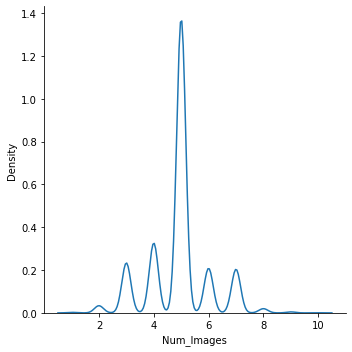

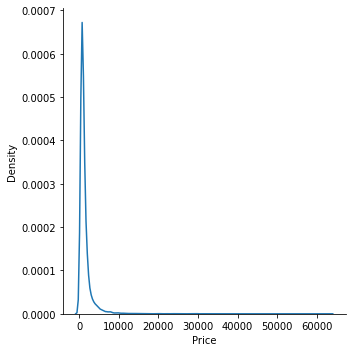

In [44]:
sns.displot(df, x="Num_Images", kind="kde")
sns.displot(df, x="Price", kind="kde")

In [29]:
#Creating a new Column “DescriptionLength” to analyse further its distribution.

df["Description_Length"]= df["Description"].str.len()

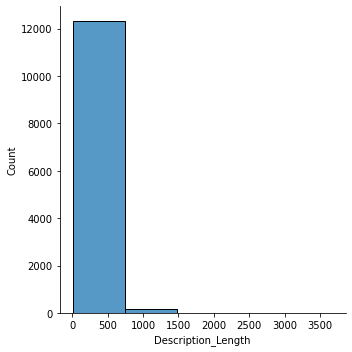

In [30]:
sns.displot(df, x="Description_Length",bins=5)

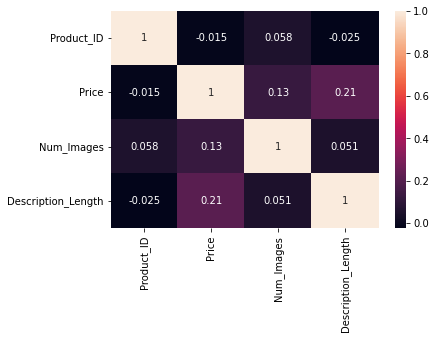

In [31]:
plt.tick_params(labelsize = 10)
sns.heatmap(df.corr(),annot=True)